In [1]:
# Stage 1 : Selection of Data

import pandas as pd
df = pd.read_csv('D:\\Public\Jyothsna\Python\Hackveda\Grade_Set_1.csv')
df

,Hours_Studied,Test_Grade,Status,Result
0,2,57,fail,D
1,3,66,fail,D
2,4,73,pass,C
3,5,76,pass,C
4,6,79,pass,C
5,7,81,pass,B
6,8,90,pass,B
7,9,96,pass,A
8,10,100,pass,A


In [2]:
# Check the dimensions of your dataset

df.shape

(9, 4)

In [3]:
# Columns

df.columns

Index(['Hours_Studied', 'Test_Grade', 'Status', 'Result'], dtype='object')

In [4]:
# Independent Variable  -->  example - Hours_Grade
# Dependent Variable   --->  example - Test_Grade

# How do we select Independent / Dependent variable ?

import matplotlib.pyplot as plt
%matplotlib inline

               Hours_Studied  Test_Grade
Hours_Studied       1.000000    0.987797
Test_Grade          0.987797    1.000000


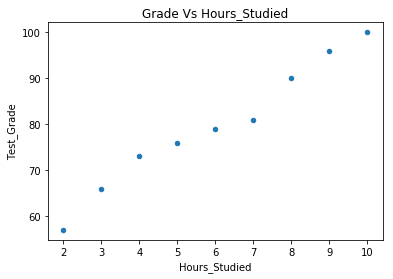

In [5]:
df.plot(kind='scatter',x='Hours_Studied',y='Test_Grade',
       title='Grade Vs Hours_Studied')
print(df.corr())

In [6]:
# Stage 2 : Preprocessing

# Convert Categorical varaibles to Numerical Features

# LabelBinarizer() :
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html

import sklearn.preprocessing as pp
lb = pp.LabelBinarizer()
print('\n Before Conversion\n',df)


 Before Conversion
    Hours_Studied  Test_Grade Status Result
0              2          57   fail      D
1              3          66   fail      D
2              4          73   pass      C
3              5          76   pass      C
4              6          79   pass      C
5              7          81   pass      B
6              8          90   pass      B
7              9          96   pass      A
8             10         100   pass      A


In [7]:
df.Status = lb.fit_transform(df.Status)
df

,Hours_Studied,Test_Grade,Status,Result
0,2,57,0,D
1,3,66,0,D
2,4,73,1,C
3,5,76,1,C
4,6,79,1,C
5,7,81,1,B
6,8,90,1,B
7,9,96,1,A
8,10,100,1,A


In [8]:
# Cleaning of Data Set --> Removal of missing Values

# isnull() --> True if it will found any missing value

df.isnull()

,Hours_Studied,Test_Grade,Status,Result
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False


In [9]:
# Remove missing values --> one more method fillana

# dropna --> drop all missing values / nan values from dataset

df = df.dropna()
df

,Hours_Studied,Test_Grade,Status,Result
0,2,57,0,D
1,3,66,0,D
2,4,73,1,C
3,5,76,1,C
4,6,79,1,C
5,7,81,1,B
6,8,90,1,B
7,9,96,1,A
8,10,100,1,A


In [11]:
# Stage 3 : Transformation

# Normalization  --> transforms your data into a range between 0 and 1.

# Xnorm = (X-Xmin) / (Xmax-Xmin)
# Select Dependent Variable
# Select Independent Variable

Y = df.Test_Grade.values   # 1d representation
Y

array([ 57,  66,  73,  76,  79,  81,  90,  96, 100], dtype=int64)

In [15]:
# Independent Variable

import numpy as np

X = df.Hours_Studied[:,np.newaxis]   # convert 1d to 2d
X

array([[ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [19]:
Xmin = X.min()
print('X min ',Xmin)

Xmax = X.max()
print('X max ',Xmax)

Xnorm = (X-Xmin) / (Xmax-Xmin)
Xnorm

X min  2
X max  10


array([[0.   ],
       [0.125],
       [0.25 ],
       [0.375],
       [0.5  ],
       [0.625],
       [0.75 ],
       [0.875],
       [1.   ]])

In [20]:
Ynorm = (Y-Y.min()) / (Y.max()-Y.min())
Ynorm

array([0.        , 0.20930233, 0.37209302, 0.44186047, 0.51162791,
       0.55813953, 0.76744186, 0.90697674, 1.        ])

In [22]:
# Stage 4  : Data Mining

# Identify an equation that can predict Y(Test_Grade) on the basis of X(Hours_Studied)

# Linear Regression 
# Formula --> Y = mX+c
# m = Co-efficient (slope) change in Y w.r.t X
# c = intercept (value of Y when X = 0)

import sklearn.linear_model as lm
lr = lm.LinearRegression()   # object for LinearRegression

lr.fit(X,Y)   # Training the model / equation

# Prediciton

hrs = int(input('Enter Study Hours : '))
marks = lr.predict(hrs)
print('Student Who Studies For',hrs,'hours, will score',marks)

Enter Study Hours : 7
Student Who Studies For 7 hours, will score [84.79444444]


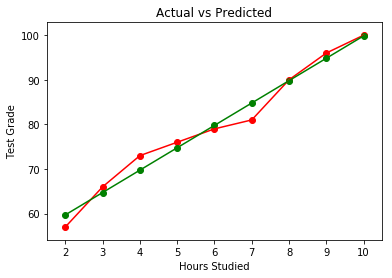

In [24]:
# Plot  --> Actual vs Predicted

plt.plot(X,Y,color='red')
plt.scatter(X,Y,color='red')
plt.xlabel('Hours Studied')
plt.ylabel('Test Grade')
plt.title('Actual vs Predicted')

# plot predicted values

plt.plot(X,lr.predict(X),color='green')
plt.scatter(X,lr.predict(X),color='green')

In [26]:
# Finding the Accuracy for pur  model

from sklearn.metrics import r2_score

accuracy = r2_score(Y,lr.predict(X))
print('Accuracy : ',accuracy)

Accuracy :  0.9757431074095347
